**Customer Segmentation Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')


In [4]:
# Display the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Check basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [13]:
# Check for missing values

# Set style
sns.set(style="whitegrid")
# Display count
print("🧼 Missing Values (Count):")
print(df.isnull().sum())


🧼 Missing Values (Count):
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [14]:
# Summary statistics
# Numeric summary styled
print("📊 Summary Statistics:")
styled_df = df.describe().style.background_gradient(cmap='Blues')
display(styled_df)


📊 Summary Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
#Column Name & Dataztypes
print("📁 Column Names and Data Types:")
for col in df.columns:
    print(f"- {col}: {df[col].dtype}")


📁 Column Names and Data Types:
- CustomerID: int64
- Gender: object
- Age: int64
- Annual Income (k$): int64
- Spending Score (1-100): int64


In [20]:
#Feature Selection and Scaling

# Select relevant features
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features = df[selected_features]

# Display the selected features nicely
print("🎯 Selected Features for Clustering:")
display(features.head())

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=selected_features)

# Preview scaled data
print("🧪 Scaled Features (Standardized):")
display(scaled_df.head())



🎯 Selected Features for Clustering:


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


🧪 Scaled Features (Standardized):


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


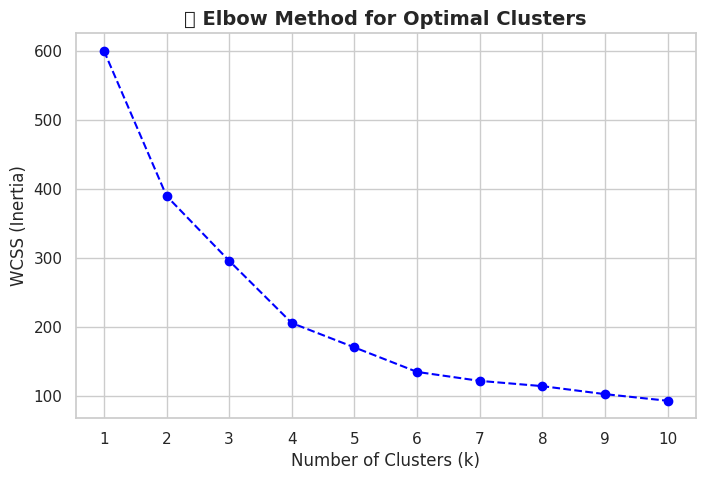

In [21]:
#Elbow Method Code
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster-Sum-of-Squares

# Try cluster sizes from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('🧠 Elbow Method for Optimal Clusters', fontsize=14, weight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


Cluster Centers (scaled features):
[[ 1.08616125 -0.49056525 -0.39717443]
 [-0.42880597  0.97484722  1.21608539]
 [-0.96249203 -0.78476346  0.39202966]
 [ 0.03720536  0.99011499 -1.18875705]]

Number of points in each cluster:
Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64


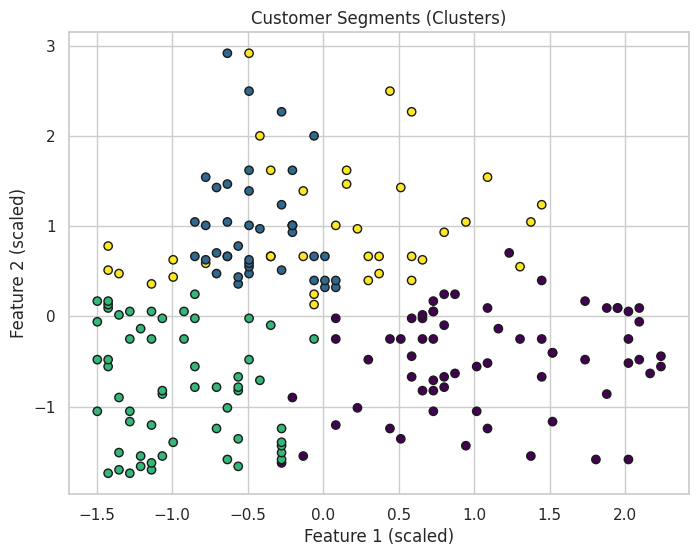

In [25]:
# Applying KMeans Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Import StandardScaler here
from sklearn.preprocessing import StandardScaler


# Step 2: Run KMeans with optimal k
k = 4  # replace with your chosen number from elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Step 3: Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Step 4: Analyze cluster centers (in scaled space)
print("Cluster Centers (scaled features):")
print(kmeans.cluster_centers_)

# Step 4 (optional): See cluster counts
print("\nNumber of points in each cluster:")
print(df['Cluster'].value_counts())

# Step 5: Visualize clusters using first two features (or PCA)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Use .iloc to access columns by integer position
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('Customer Segments (Clusters)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

In [27]:
# View average values of original features for each cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         69.415385  53.984615           47.707692               39.969231
1        161.025000  32.875000           86.100000               81.525000
2         53.438596  25.438596           40.000000               60.298246
3        160.552632  39.368421           86.500000               19.578947


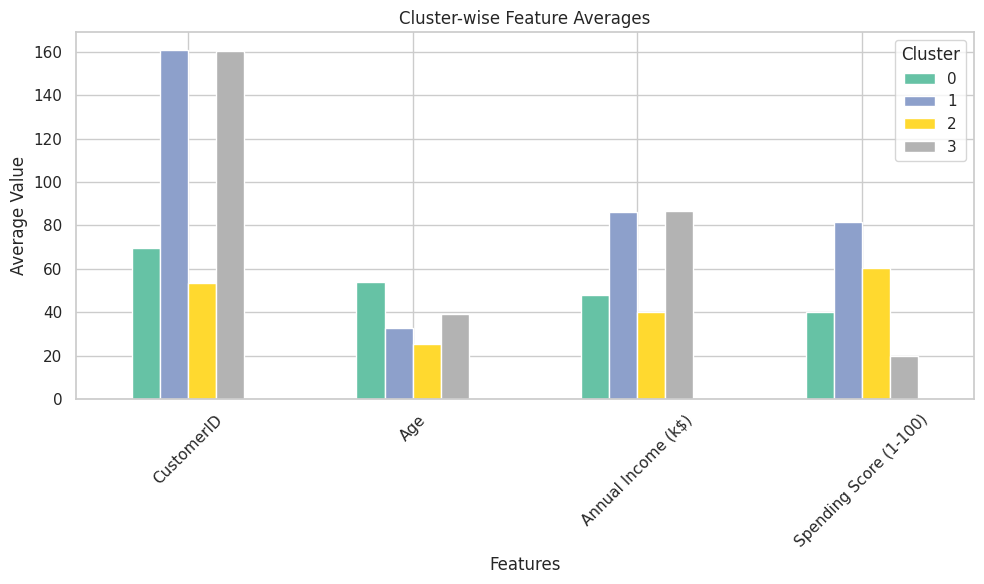

In [28]:
#Visualize Cluster Profiles
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose for better plotting
cluster_summary.T.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Cluster-wise Feature Averages')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
